# Online Shoppers Purchasing Intention 
### Zoccoli Carlo s267546


#### Index

1. [Introduction](#Introduction) 
2. [Explore the dataset](#Explore-the-Dataset)
    1. [Label Distribution and Metric](#Label-Distribution-and-Metric)
    2. [Distribution of the features](#Distribution-of-the-features)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Introduction


The dataset used for this study is the __Online Shoppers Purchasing Intention Dataset__ available at this [link](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

The dataset is composed by 12330 sessions, which each session identifies an user, in a period of 1 year to avoid any tendency to a specific compaign, special day, user profile or period. 

The dataset contains 18 attributes, which 10 numerical and 8 categorical attributes.


The attribute are:
* Information about the type of page visited and how much time spent of each categories:
    * *Administrative*
    * *AdministrativeDuration*
    * *Informational* 
    * *InformationalDuration*
    * *ProductRelated*
    * *ProductRelatedDuration*


* Google Analytics's data:
    * *BounceRate*: percentage of visitors who enter the site from that page and then leave ('bounce') without triggering any other requests to the analytics server during that session.
    * *ExitRate*: feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
    * *PageValue*: feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
  

* User's navigation data 
    * *OperatingSystem*: type of OS used by the user
    * *Browser*: type of browser used by the user
    * *Region*: user's region of origin 
    * *TrafficType*
    * *VisitorType*: the type of visitor which are: *Returing_Visitator*, *New_Visitator* and *Other*


* Timing attribute:
     * *SpecialDay*: indicate the closeness of the site visiting time to a specific special day in which the the sessions are more likely to tbe finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
     * *Month*

The analysis is done with Python 3.7 and the following packages:
* Pandas: it is an open source library that provides data structure and data analysis tool that are very powerful.
* Numpy: it is an open source library that provides N-dimensional array objects to allow fast scientific computing.
* Scikit-learn: it is an open source machine learning library that supports supervised and unsupervised learning.It provides machine algorithms and also data preprocessing, model selection and evaluation, and many other utilities.
* Plotly: it's a graphing library maske interactive, pubblication-quality graphs.
* *ipwidgets*: package that allows to have interactive HTML widgets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler
from plotly.subplots import make_subplots
from ipywidgets import widgets, interact

In [3]:
def calculate_perc(X, y, perc=True):
    sums_true = []
    sums_false = []
    X_set = set(X)
    
    for i in X_set:
        sum_true = 0
        sum_false = 0
        for j, label in zip(X, y):
            if i == j:
                if label is True:
                    sum_true = sum_true + 1
                else:
                    sum_false = sum_false + 1
        sums_true.append(sum_true)
        sums_false.append(sum_false)
    
    if perc is False:
        return sums_true, sums_false
    
    sums_tot = [i + j for i, j in zip(sums_false, sums_true)]
    perc_false = np.divide(sums_false, sums_tot) * 100
    perc_true = np.divide(sums_true, sums_tot) * 100
    
    return perc_true, perc_false
    
def plt_pieChart(X, y, title):

    X_set = set(X)
    explode = [0.1 for i in range(len(X_set))]
        
    perc_true, perc_false = calculate_perc(X, y)
    
    pie = plt.pie(perc_false, labels=X_set, shadow=True, startangle=90, explode=explode, autopct='%1.1f%%')
    plt.legend(pie[0], X_set)
    plt.axis('equal')
    plt.title(title + 'revenue: FALSE')
    plt.show()
                            
    pie = plt.pie(perc_true, labels=X_set, startangle=90, shadow=True, explode=explode, autopct='%1.1f%%')
    plt.legend(pie[0], X_set)
    plt.axis('equal')
    plt.title(title + 'revenue: TRUE')
    plt.show()
    

def dynamic_barChart(dataset, feature, perc):
    sums_true = []
    sums_false = []
    
    X_set = set(dataset[feature])  
    x_set = [i for i in X_set]
    y = dataset['Revenue']
    
    if perc is False:
        title = "Number of samples for each revenue of " + feature
        yaxis = "Number of samples"
    else:
        title = "Percentage of samples for each revenue of " + feature
        yaxis = "Percantage of samples %"
        
    perc_true, perc_false = calculate_perc(dataset[feature], y, perc)
    fig = go.Figure(data=[
        go.Bar(name='True', x=x_set, y=perc_true),
        go.Bar(name='False', x=x_set, y=perc_false)
    ])
    fig.update_layout(
                        barmode='group',
                        title=title,
                        yaxis= dict(
                            title=yaxis,  
                        ),
                        xaxis=dict(
                            title=feature
                        ),
                     )
    fig.show()

def dynamic_boxPlot(dataset, feature_x, feature_y):
    fig = px.box(dataset,
            y=feature_y,
            x=feature_x,
            color="Revenue"
            )
    fig.update_layout(
        boxmode='group',
         yaxis= dict(
            title=feature_y,  
        ),
        xaxis=dict(
            title=feature_x
        ),
    )
    fig.show()


def plot_boxblot_menu(dataset, feature_x, feature_y):
    sns.boxplot(dataset[feature_x], dataset[feature_y], hue=dataset['Revenue'])
    plt.title( feature_x + ' vs ' + feature_y)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc=2)
    plt.show()

def plot_pieChart_menu(dataset, feature, show_labels='All'):
    
    perc_true, perc_false = calculate_perc(dataset[feature], dataset['Revenue'])
    X_set = set(dataset[feature])  
    x_set = [i for i in X_set]
    
    if show_labels == 'All':
        # true pieChart
        fig = go.Figure(data=[
            go.Pie(labels=x_set,
                  values=perc_true)
        ])
        fig.update_layout(
            title= feature +', Revenue: True'
        )
        fig.show()

        #false pieChart
        fig = go.Figure(data=[
            go.Pie(labels=x_set,
                  values=perc_false)
        ])
        
        fig.update_layout(
            title= feature + ', Revenue: False'
        )
        fig.show()
        
    elif show_labels == 'True':
        # true pieChart
        fig = go.Figure(data=[
            go.Pie(labels=x_set,
                  values=perc_true)
        ])
        fig.update_layout(
            title= feature +', Revenue: True'
        )
        fig.show()
        
    elif show_labels == 'False':
        fig = go.Figure(data=[
            go.Pie(labels=x_set,
                  values=perc_false)
        ])
        fig.update_layout(
            title= feature + ', Revenue: False'
        )
        fig.show()

def plot_label_distribution(df, perc = False):
    count_false = np.array([1 for i in df['Revenue'] if i is False]).sum(axis=0)
    count_true = np.array([1 for i in df['Revenue'] if i is True]).sum(axis=0)
    colors = ['#475CC5', '#FF6B00']
    yaxis = 'Count'
    x = ['True', 'False']
    y = [count_true, count_false]
    
    if perc is True:
        perc_false = count_false / (count_false + count_true) * 100
        perc_true = count_true / (count_false + count_true) * 100
        yaxis = 'Percentage'
        y = [perc_true, perc_false]

    fig = go.Figure(data=[
        go.Bar(x=x, y=y, marker_color=colors)
    ])
    fig.update_layout(
                        barmode='group',
                        title='Label Distribution',
                        yaxis= dict(
                            title=yaxis,  
                        ),
                        xaxis=dict(
                            title='Revenue'
                        ),
                     )
    fig.show()
   
    
type_visitors = {
    'New_Visitor': 1,
    'Returning_Visitor': 2,
    'Other': 3
}

months = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

bol_value = {
    False: 0,
    True: 1
}

### Explore the Dataset

The dataset has 12330 rows and 18 columns.

There aren't missing values in the dataset.

We can see a part of the dataset to understand the type of the attributes:

In [4]:
dataset = pd.read_csv('online_shoppers_intention.csv')
#print(dataset.describe())
print(dataset.shape)
dataset.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


The attributes "Month", "VisitorType", "Weekend" and "Revenue" have  string values and they are changed in numerical values.

The attributes "Administrative", "Informational", "ProductRelated", "OperatingSystems", "Browser", "Region" and "TrafficType" have a finite set of number values. 

The classification is based on the *Revenue* attribute, which has only 2 values, so we have a binary classification.

In [5]:
X = dataset.copy()
X['Month'] = X['Month'].replace(months)
X['Revenue'] = X['Revenue'].replace(bol_value)
X['VisitorType'] = X['VisitorType'].replace(type_visitors)
X['Weekend'] = X['Weekend'].replace(bol_value)

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


As we can see in the following bar chart, the label distribution is unbalanced and for this reason I consider the *F-score* as metric.

The number of samples are:
* *True Label*: 1908 samples 
* *False Label*: 10422 samples 


#### F-score 
The *F-score* metric is calculated through the *precision* and *reacall* that are also a metrics.

The *precision* and *recall* metrics are calculated on the *confusion matrix* which is a matrix with predicted labels as columns and the real labels as rows. In this way we have the cells that are *True Positive*, *True Negative*, *False Negative* and *False Positive* for each combination of the labels.

*Confusion matrix*

|                   |Predict Label A                | Predict Label B       |
|---                | ---                           |---                    |
|**True Label A**   |    *True Positive*              |    *False Positive*     |
|**True Label B**   |    *False Negative*             |    *True Negative*      |

From the *confusion matrix* we can calculate the *precision* and *recall* and then *f-score*

$$precision = \frac{True\ Positive}{True\ Positive + False\ Positive}$$


$$recall = \frac{True\ Positive}{True Positive + False\ Negative}$$


$$f\_score = \frac{2 * Recall * Precision}{Recall + Precision}$$



The bar chart below allows to have on the *Y-axis* the number or the percentage of the samples in base on the value assign or less to the *CheckBox*.

In [6]:
# label distribution
interactive_plot3 = interact(lambda perc : plot_label_distribution(dataset, perc), 
                             perc=widgets.Checkbox(
                                        value=False,
                                        description='Show percantage %',
                                        disabled=False
                                    )
                            )

interactive(children=(Checkbox(value=False, description='Show percantage %'), Output()), _dom_classes=('widget…

We can see in the following tables thanks to *describe* function of *pandas* which showes us:

* *count*: the number of samples
* *std*: the standard deviation for each feature
* *min*: the minimum value of the feature
* *25%*: The first percentile (the lower one)
* *50%*: The second percentile (the median)
* *75%*: The third percentile (the upper one)
* *max*: the maximum value of the feature


In [7]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


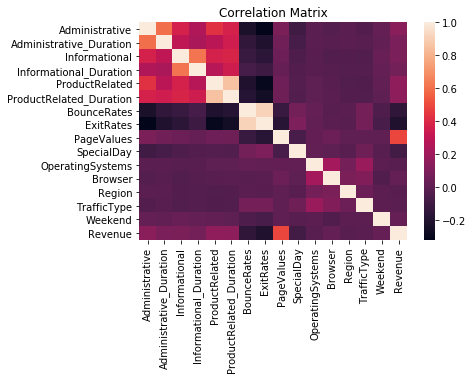

interactive(children=(Dropdown(description='feature_x', options=('Month', 'VisitorType'), value='Month'), Drop…

interactive(children=(Dropdown(description='feature', options=('Browser', 'OperatingSystems', 'TrafficType'), …

interactive(children=(Dropdown(description='feature', options=('Region', 'Weekend', 'VisitorType'), value='Reg…

In [8]:
correlation_matrix = dataset.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values)
plt.show()

# menu for boxplot
interactive_plot = interact(lambda feature_x, feature_y : dynamic_boxPlot(dataset, feature_x, feature_y), 
                            feature_x= ['Month', 'VisitorType'], 
                            feature_y = ['PageValues', 'ExitRates', 'BounceRates'])

# menu for dynamic pieChart
interactive_plot2 = interact(lambda feature, show_labels : plot_pieChart_menu(dataset, feature, show_labels),
                            feature=['Browser', 'OperatingSystems', 'TrafficType'],
                            show_labels=['All', 'True', 'False'])
# menu for dynamic barChart
interactive_plot3 = interact(lambda feature, perc : dynamic_barChart(dataset, feature, perc), 
                             feature=['Region', 'Weekend', 'VisitorType'],
                             perc=widgets.Checkbox(
                                        value=False,
                                        description='%',
                                        disabled=False
                                    )
                            )

In [9]:
y = X['Revenue'].copy()
X = X.drop(['Revenue'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test:', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (9864, 17)
y_train:  (9864,)
X_test: (2466, 17)
y_test:  (2466,)
